In [1]:
ls

10-15th May,2024,Friday work on datasets format.ipynb
10th June,movie2-Copy1.ipynb
10th June,movie2.ipynb
15th April,2024.ipynb
16th April,2024.ipynb
17 April 2024, Wednesday.ipynb
17 June, movie 2.ipynb
18 April,2024, Thursday.ipynb
19 April, friday.ipynb
21 April,2024,sunday.ipynb
23rd April, Tuesday.ipynb
24th April, wednesday.ipynb
25th April,2024, Thursday .ipynb
26th april,2024, friday.ipynb
28 April,2024,sunday.ipynb
29th April, monday.ipynb
2nd May ,2024, Thursday.ipynb
5th June, movie.ipynb
5th May,2024,Sunday.ipynb
6th may, Monday.ipynb
7thMay, 2024, Tuesday.ipynb
8th May,wednesday.ipynb
9th may, Thursday.ipynb
Applications/
BrainTumor.csv
Data Engineer Salaries.ipynb
Desktop/
Documents/
Downloads/
Hello World/
Library/
Machine learning .ipynb
Mall_Customers.csv
Movies/
Music/
Numpy assignment.ipynb
Pictures/
Public/
Seattle2014.csv
Untitled.ipynb
Untitled1.ipynb
WLD_RTFP_country_2023-10-02.csv
WLD_RTP_details_2023-10-02.csv
animal data.ipynb
c4_epa_air_quality.csv
california

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movie2=pd.read_csv('modified_data.csv')

In [4]:
movie2.shape

(9568, 8)

In [5]:
movie2.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Scarface,1932.0,"\nAction, Crime, Drama",7.8,\nAn ambitious and nearly insane violent gangs...,"\n Directors:\nHoward Hawks, \nRichard Ross...","26,365",93.0
1,Söderkåkar,1932.0,\nComedy,5.3,\nThe movie version of Gideon Wahlbergs comedy...,\n Director:\nWeyler Hildebrand\n| \n St...,59,87.0
2,Kära släkten,1933.0,\nComedy,5.4,\nThe story about a Stockholm wholesaler and h...,\n Director:\nGustaf Molander\n| \n Star...,36,94.0
3,Karriär,1938.0,\nDrama,5.2,\nA traveling theater company in Sweden. Confl...,\n Director:\nSchamyl Bauman\n| \n Stars...,52,106.0
4,Dumbo,1941.0,"\nAnimation, Adventure, Drama",7.2,"\nRidiculed because of his enormous ears, a yo...","\n Directors:\nSamuel Armstrong, \nNorman F...","124,409",64.0


In [6]:
movie2.isnull().sum()

MOVIES         0
YEAR           0
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [7]:
# since the null value of genre is merely 0.8%, we can drop it 
# we can also replace null values with 'Unknown'
# but lets replace it with the most repeated genre
repeated_genre=movie2['GENRE'].mode()
repeated_genre

0    \nComedy            
Name: GENRE, dtype: object

In [8]:
repeated_genre2=movie2['GENRE'].mode()[0]
repeated_genre2
#previous code gives series, not applicable to replace na as we need single value

'\nComedy            '

In [9]:
movie2['GENRE'].fillna(repeated_genre2,inplace=True)

In [10]:
movie2['GENRE'].isnull().sum()

0

In [11]:
movie2.isnull().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [12]:
movie2.shape

(9568, 8)

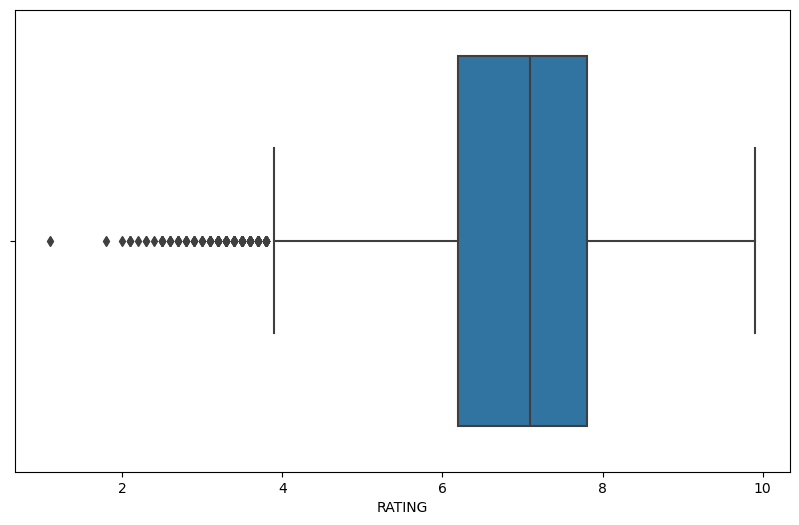

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RATING',data = movie2)
plt.show()

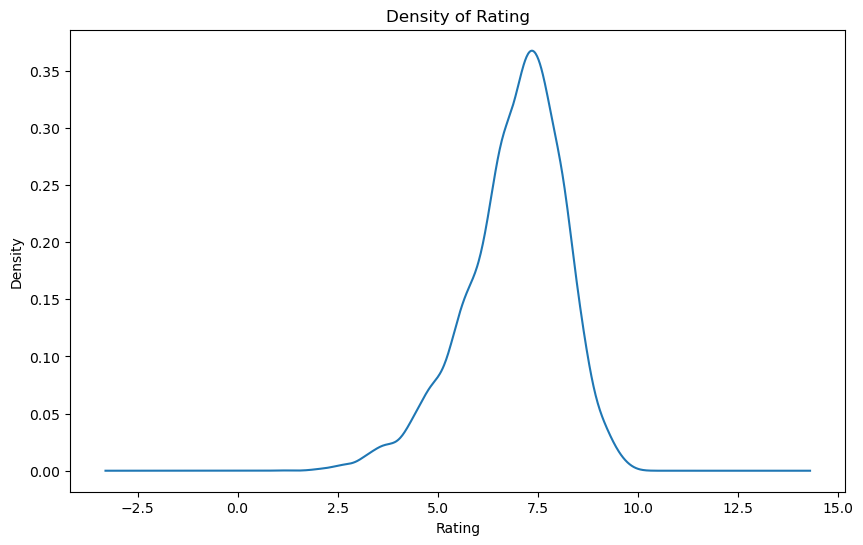

In [14]:
movie2['RATING'].plot(kind='density',figsize=(10,6))
plt.title('Density of Rating')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show() 

In [15]:
movie2.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Scarface,1932.0,"\nAction, Crime, Drama",7.8,\nAn ambitious and nearly insane violent gangs...,"\n Directors:\nHoward Hawks, \nRichard Ross...","26,365",93.0
1,Söderkåkar,1932.0,\nComedy,5.3,\nThe movie version of Gideon Wahlbergs comedy...,\n Director:\nWeyler Hildebrand\n| \n St...,59,87.0
2,Kära släkten,1933.0,\nComedy,5.4,\nThe story about a Stockholm wholesaler and h...,\n Director:\nGustaf Molander\n| \n Star...,36,94.0
3,Karriär,1938.0,\nDrama,5.2,\nA traveling theater company in Sweden. Confl...,\n Director:\nSchamyl Bauman\n| \n Stars...,52,106.0
4,Dumbo,1941.0,"\nAnimation, Adventure, Drama",7.2,"\nRidiculed because of his enormous ears, a yo...","\n Directors:\nSamuel Armstrong, \nNorman F...","124,409",64.0


In [16]:
Q1 = movie2['RATING'].quantile(0.25)
Q3 = movie2['RATING'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = movie2[(movie2['RATING'] < lower_bound) | (movie2['RATING'] > upper_bound)]
outliers


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
56,Nu jing cha,1973.0,"\nAction, Crime",3.6,"\nHo Mei Fong is a young woman in trouble, run...",\n Director:\nMu Chu\n| \n Stars:\nCharl...,"1,446",80.0
152,Evicted,1999.0,\nComedy,3.8,\n24 hours in the lives of three L.A. youths d...,\n Director:\nMichael Tierney\n| \n Star...,80,99.0
181,Taboo,2002.0,"\nDrama, Horror, Mystery",3.6,"\nWhile staying at a secluded mansion, six you...",\n Director:\nMax Makowski\n| \n Stars:\...,"1,860",80.0
226,James,2005.0,"\nAction, Romance",3.6,\nA story of a young man's quest to avenge the...,\n Director:\nRohit Jugraj\n| \n Stars:\...,340,NaN
246,The Adventures of Sharkboy and Lavagirl 3-D,2005.0,"\nAction, Adventure, Comedy",3.7,\nA young boy is recruited by his imaginary fr...,\n Director:\nRobert Rodriguez\n| \n Sta...,"34,853",93.0
...,...,...,...,...,...,...,...,...
7940,Black Privilege,2023.0,\nFamily,3.3,\nWhen low-income families move into a thrivin...,\n Director:\nMark Harris\n| \n Stars:\n...,205,79.0
8013,Heebie Jeebies,2023.0,\nHorror,3.4,\nWhen a haunted gold mine is reopened after a...,\n Director:\nThomas L. Callaway\n| \n S...,486,85.0
8114,Chichipatos: ¡Qué chimba de Navidad!,2023.0,"\nComedy, Drama",3.3,"\nBefore the events of S1, Juanquini, El Ñato ...",\n Director:\nJuan Camilo Pinzon\n| \n S...,108,82.0
8605,LEGO Friends: Happy Birthday to You!,2023.0,"\nAnimation, Short",3.6,\nSurprise. The gang's all here to celebrate y...,\n,5,1.0


In [17]:
movie2.iloc[56]
#lets check the authencity of the oultliers of rating

MOVIES                                            Nu jing cha
YEAR                                                   1973.0
GENRE                             \nAction, Crime            
RATING                                                    3.6
ONE-LINE    \nHo Mei Fong is a young woman in trouble, run...
STARS       \n    Director:\nMu Chu\n| \n    Stars:\nCharl...
VOTES                                                   1,446
RunTime                                                  80.0
Name: 56, dtype: object

In [18]:
movie2.iloc[7940]

MOVIES                                        Black Privilege
YEAR                                                   2023.0
GENRE                                    \nFamily            
RATING                                                    3.3
ONE-LINE    \nWhen low-income families move into a thrivin...
STARS       \n    Director:\nMark Harris\n| \n    Stars:\n...
VOTES                                                     205
RunTime                                                  79.0
Name: 7940, dtype: object

In [19]:
movie2.iloc[226]
# the ratings are correct

MOVIES                                                  James
YEAR                                                   2005.0
GENRE                           \nAction, Romance            
RATING                                                    3.6
ONE-LINE    \nA story of a young man's quest to avenge the...
STARS       \n    Director:\nRohit Jugraj\n| \n    Stars:\...
VOTES                                                     340
RunTime                                                   NaN
Name: 226, dtype: object

In [20]:
total_observations = len(movie2)
total_outliers = len(outliers)
percentage_outliers = (total_outliers / total_observations) * 100
percentage_outliers

1.7244983277591972

In [21]:
outliers['RATING'].max()

3.8

In [22]:
outliers['RATING'].min()

1.1

In [23]:
mean_rating=movie2['RATING'].mean()
mean_rating
# we can see the total outliers percentage is about 1.72%
# Also the outliers fall betn 1.1-3.8 which is far from the mean value 6.91 which might be 
# the reason that led them to consider the lowest value(ratings) as outliers

6.919698824681684

In [24]:
skew_rating = movie2['RATING'].skew()
skew_rating

-0.701776450422828

In [25]:
# since the data is left skewed, we will fill na with median values
median_rating = movie2['RATING'].median()
median_rating

7.1

In [26]:
movie2['RATING'].fillna(median_rating,inplace = True)

In [27]:
movie2['RATING'].isnull().sum()

0

In [28]:
movie2.isnull().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [29]:
movie2['VOTES']
#since python is case sensitive, the comma in 26,365 resulted in a string type
#lets deal with it first

0        26,365
1            59
2            36
3            52
4       124,409
         ...   
9563        NaN
9564        NaN
9565        980
9566        NaN
9567        911
Name: VOTES, Length: 9568, dtype: object

In [30]:
movie2['VOTES'] = movie2['VOTES'].str.replace(',','')

In [31]:
movie2['VOTES']

0        26365
1           59
2           36
3           52
4       124409
         ...  
9563       NaN
9564       NaN
9565       980
9566       NaN
9567       911
Name: VOTES, Length: 9568, dtype: object

In [32]:
movie2['VOTES'].unique()

array(['26365', '59', '36', ..., '3404', '980', '911'], dtype=object)

In [33]:
#type is still object as the numbers are in string 
#convert to numeric type 
movie2['VOTES'] = pd.to_numeric(movie2['VOTES'], errors='coerce')
movie2['VOTES'] = movie2['VOTES'].astype('Int64')

In [34]:
movie2['VOTES']

0        26365
1           59
2           36
3           52
4       124409
         ...  
9563      <NA>
9564      <NA>
9565       980
9566      <NA>
9567       911
Name: VOTES, Length: 9568, dtype: Int64

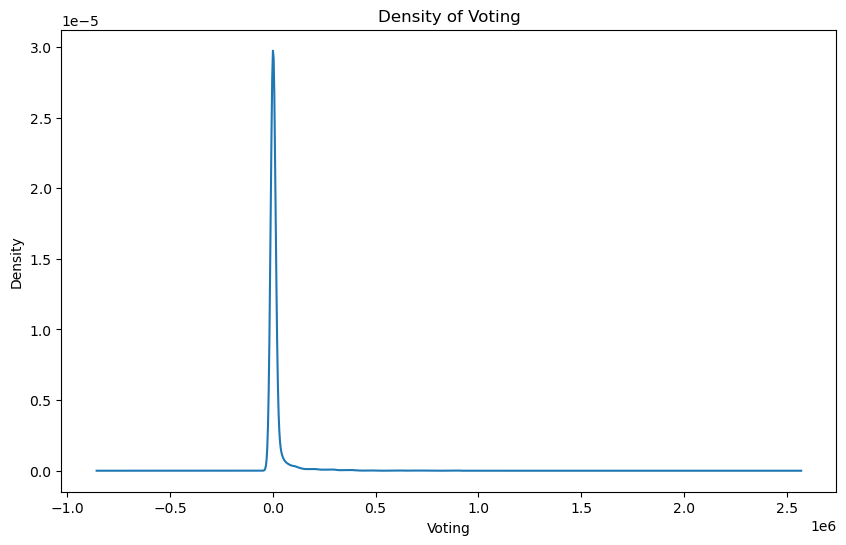

In [35]:
movie2['VOTES'].plot(kind='density',figsize=(10,6))
plt.title('Density of Voting')
plt.xlabel('Voting')
plt.ylabel('Density')
plt.show()

In [36]:
Q1 = movie2['VOTES'].quantile(0.25)
Q3 = movie2['VOTES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
voters_outliers = movie2[(movie2['VOTES'] < lower_bound) | (movie2['VOTES'] > upper_bound)]
voters_outliers

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Scarface,1932.0,"\nAction, Crime, Drama",7.8,\nAn ambitious and nearly insane violent gangs...,"\n Directors:\nHoward Hawks, \nRichard Ross...",26365,93.0
4,Dumbo,1941.0,"\nAnimation, Adventure, Drama",7.2,"\nRidiculed because of his enormous ears, a yo...","\n Directors:\nSamuel Armstrong, \nNorman F...",124409,64.0
10,The Stranger,1946.0,"\nCrime, Drama, Film-Noir",7.4,\nAn investigator from the War Crimes Commissi...,\n Director:\nOrson Welles\n| \n Stars:\...,25188,95.0
15,Winchester '73,1950.0,"\nAction, Drama, Western",7.6,\nA cowboy's obsession with a stolen rifle lea...,\n Director:\nAnthony Mann\n| \n Stars:\...,18670,92.0
29,The Ten Commandments,1956.0,"\nAdventure, Drama",7.9,"\nMoses, an Egyptian Prince, learns of his tru...",\n Director:\nCecil B. DeMille\n| \n Sta...,66532,220.0
...,...,...,...,...,...,...,...,...
9386,Dark,2023.0,"\nCrime, Drama, Mystery",9.4,"\nIn 2020, a visitor delivers a warning to Cla...",\n Director:\nBaran bo Odar\n| \n Stars:...,11905,64.0
9387,Dark,2023.0,"\nCrime, Drama, Mystery",9.3,\nAdam holds Martha captive in 2020. On the da...,\n Director:\nBaran bo Odar\n| \n Stars:...,11525,59.0
9388,Dark,2023.0,"\nCrime, Drama, Mystery",9.6,"\nAcross three centuries, residents of Winden ...",\n Director:\nBaran bo Odar\n| \n Stars:...,15128,69.0
9389,Dark,2023.0,"\nCrime, Drama, Mystery",9.7,\nClaudia reveals to Adam how everything is co...,\n Director:\nBaran bo Odar\n| \n Stars:...,20230,73.0


In [37]:
observations = len(movie2)
total_voters_outliers = len(voters_outliers)
percentage_voters_outliers = (total_voters_outliers / observations) * 100
percentage_voters_outliers

13.566053511705686

In [38]:
movie2['VOTES'].skew()

11.494636391779755

In [39]:
 voters_outliers[voters_outliers['YEAR'] == 2023]
#trying to check if outliers were for previous year only or for lastest timline as well

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6623,The Walking Dead,2023.0,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0
6624,Dexter,2023.0,"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...",665387,53.0
6625,Lucifer,2023.0,"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222,42.0
6626,Breaking Bad,2023.0,"\nCrime, Drama, Thriller",9.4,\nA high school chemistry teacher diagnosed wi...,"\n \n Stars:\nBryan Cranston, \n...",1552311,49.0
6627,Atypical,2023.0,"\nComedy, Drama",8.3,"\nSam, an 18-year-old on the autism spectrum, ...",\n \n Stars:\nJennifer Jason Lei...,71544,30.0
...,...,...,...,...,...,...,...,...
9386,Dark,2023.0,"\nCrime, Drama, Mystery",9.4,"\nIn 2020, a visitor delivers a warning to Cla...",\n Director:\nBaran bo Odar\n| \n Stars:...,11905,64.0
9387,Dark,2023.0,"\nCrime, Drama, Mystery",9.3,\nAdam holds Martha captive in 2020. On the da...,\n Director:\nBaran bo Odar\n| \n Stars:...,11525,59.0
9388,Dark,2023.0,"\nCrime, Drama, Mystery",9.6,"\nAcross three centuries, residents of Winden ...",\n Director:\nBaran bo Odar\n| \n Stars:...,15128,69.0
9389,Dark,2023.0,"\nCrime, Drama, Mystery",9.7,\nClaudia reveals to Adam how everything is co...,\n Director:\nBaran bo Odar\n| \n Stars:...,20230,73.0


In [40]:
movie2.iloc[9388]

MOVIES                                                   Dark
YEAR                                                   2023.0
GENRE                     \nCrime, Drama, Mystery            
RATING                                                    9.6
ONE-LINE    \nAcross three centuries, residents of Winden ...
STARS       \n    Director:\nBaran bo Odar\n| \n    Stars:...
VOTES                                                   15128
RunTime                                                  69.0
Name: 9388, dtype: object

In [41]:
#after lots and lots of trial and errors 
#processes like capping, winsorizing, transformation and whatnot, 
#the outliers rather kept on increasing 
#so the data had to be checked one by one(sampling mostly)

In [42]:
voters_outliers['GENRE'].unique()

array(['\nAction, Crime, Drama            ',
       '\nAnimation, Adventure, Drama            ',
       '\nCrime, Drama, Film-Noir            ',
       '\nAction, Drama, Western            ',
       '\nAdventure, Drama            ', '\nHorror, Sci-Fi            ',
       '\nAdventure, Biography, Drama            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama            ',
       '\nAdventure, Comedy, Crime            ',
       '\nBiography, Drama, History            ',
       '\nDrama, Horror            ', '\nAdventure, Sci-Fi            ',
       '\nAction, Drama, History            ',
       '\nAction, Comedy, Crime            ',
       '\nFamily, Fantasy, Musical            ',
       '\nDrama, Romance            ',
       '\nAdventure, Comedy, Fantasy            ',
       '\nAdventure, Thriller            ',
       '\nAdventure, Horror, Thriller            ',
       '\nComedy            ', '\nMusical, Romance            ',
       '\nAction, Comedy          

In [43]:
voters_outliers['RATING'].unique()

array([7.8, 7.2, 7.4, 7.6, 7.9, 8. , 8.3, 6.5, 7.7, 7. , 7.3, 6.4, 8.2,
       5.8, 7.5, 8.1, 6.2, 6.6, 6.9, 5.7, 6.8, 6.7, 6.3, 8.4, 8.7, 6.1,
       7.1, 8.6, 8.8, 5.5, 5.9, 5.3, 8.9, 5.4, 5.2, 3.7, 8.5, 3.8, 4.5,
       4.4, 5.1, 4.6, 4.7, 9.5, 9.2, 5.6, 3.5, 4.8, 9.3, 4.2, 6. , 3.4,
       3.9, 9.1, 3.2, 5. , 4. , 3.3, 4.3, 9. , 4.9, 1.1, 9.4, 3.1, 2.8,
       3. , 2.9, 9.6, 9.9, 9.7, 9.8])

In [44]:
voters_outliers['RunTime'].unique()

array([ 93.,  64.,  95.,  92., 220.,  81., 197., 115., 129., 228., 105.,
       120., 137., 112., 149., 132.,  99., 100., 144.,  91., 124., 114.,
       116., 109., 110., 111.,  94., 133., 107., 117., 125., 119.,  86.,
       128., 103.,  89., 104., 118.,  84., 127., 154., 102.,  97., 106.,
        87.,  24., 134.,  22., 150., 101.,  78.,  96., 178.,  88.,  85.,
        60.,  75., 179., 121., 201.,  46.,  41., 122.,  42.,  25.,  98.,
       145., 130., 151., 126.,  26.,  12.,  48., 140.,  43.,  58., 161.,
        30., 113., 108., 331.,  20., 300.,  76., 169.,  83.,  90., 139.,
        10.,  23., 131.,  80., 174., 557.,  53., 231., 138.,   8., 163.,
       158.,  31., 156.,  79.,  82., 152., 264.,  51.,  45., 370., 136.,
       147., 452., 267., 123.,  50., 135.,  17., 172.,  52., 542., 230.,
       143., 192.,  44., 572., 403., 386., 356.,  28., 236.,  40.,  15.,
       209., 187., 385., 296., 461.,  55., 281., 229., 395.,  68., 498.,
        nan, 227., 148.,  49.,  32., 358., 191.,  1

In [45]:
voters_outliers.max()

MOVIES                                                  Ófærð
YEAR                                                   2023.0
GENRE                                  \nThriller            
RATING                                                    9.9
ONE-LINE    \nZeitgeist: Addendum attempts to locate the r...
STARS       \n    Directors:\nZoya Akhtar, \nDibakar Baner...
VOTES                                                 1713028
RunTime                                                 629.0
dtype: object

In [46]:
voters_outliers.min()

MOVIES                                        BoJack Horseman
YEAR                                                   1932.0
GENRE                                    \nAction            
RATING                                                    1.1
ONE-LINE    \n"The Defiant Ones" examines the partnership ...
STARS         \n            \n    Star:\nDavid Attenborough\n
VOTES                                                    9236
RunTime                                                   8.0
dtype: object

In [47]:
#we can see that majority of the outliers genre are drama 
#Also the min outlier of vote is 9236 
#This indicates that dramas have huge no. of fanbase compared to other genres
#so we will leave the votes as it is and fill na with 0 to maintain the original dataset

In [48]:
movie2['VOTES'].fillna(0,inplace= True)

In [50]:
movie2.to_csv('movie2.csv', index=False)
movie2.to_excel('movie2.xlsx', index=False) 

In [1]:
ls

10-15th May,2024,Friday work on datasets format.ipynb
10th June,movie2-Copy1.ipynb
10th June,movie2.ipynb
15th April,2024.ipynb
16th April,2024.ipynb
17 April 2024, Wednesday.ipynb
17 June, movie 2.ipynb
18 April,2024, Thursday.ipynb
19 April, friday.ipynb
21 April,2024,sunday.ipynb
23rd April, Tuesday.ipynb
24th April, wednesday.ipynb
25th April,2024, Thursday .ipynb
26th april,2024, friday.ipynb
28 April,2024,sunday.ipynb
29th April, monday.ipynb
2nd May ,2024, Thursday.ipynb
5th June, movie.ipynb
5th May,2024,Sunday.ipynb
6th may, Monday.ipynb
7thMay, 2024, Tuesday.ipynb
8th May,wednesday.ipynb
9th may, Thursday.ipynb
Applications/
BrainTumor.csv
Data Engineer Salaries.ipynb
Desktop/
Documents/
Downloads/
Hello World/
Library/
Machine learning .ipynb
Mall_Customers.csv
Movies/
Music/
Numpy assignment.ipynb
Pictures/
Public/
Seattle2014.csv
Untitled.ipynb
Untitled1.ipynb
WLD_RTFP_country_2023-10-02.csv
WLD_RTP_details_2023-10-02.csv
animal data.ipynb
c4_epa_air_quality.csv
california